# **Medical-Insurance-Premium-Regression Analysis Using Artificial Neural Networks (ANN)**

### UNDERSTANDING THE BUSINESS CASE

### This case study aims to build, train and test a machinie learning model to predict insurance cost based on customer features such as age, gender, Body Mass Index (BMI), number of children, smoking habits, and geo-location. 


#### Objectives:
1. Perform data cleaning, feature engineering and visualization
2. Build, train and test an artificial neural network model in Keras and Tensorflow
3. Understand the theory and intuition behind artificial neural networks
    

#### Available features include:
* Inputs: 
1. age: Customer's age
2. sex : Insurance contractor gender
3. bmi: Body Mass Index (18.5 to 24.9 for ideal bmi)
4. Children: Number of children covered by health insurance/number of dependents
5. smoker: Smoking habit of customers
6. region: The beneficiary's residential area in the US, Northeast, Southeast, Southwest, Northwest
* Target (output):  
1. charges: Individual medical costs billed by health insurance



#### Data Source: https://www.kaggle.com/datasets/mirichoi0218/insurance


## IMPORTING LIBRARIES AND DATASETS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
# setting the style of the notebook to be monokai theme  
# To ensure that we are able to see the x and y axes clearly since backgrund is black


In [3]:
# read the csv file 
insurance_df = pd.read_csv ('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Check the dataframe info
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### EXPLORATORY DATA ANALYSIS - PART 1

In [5]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values


<Axes: >

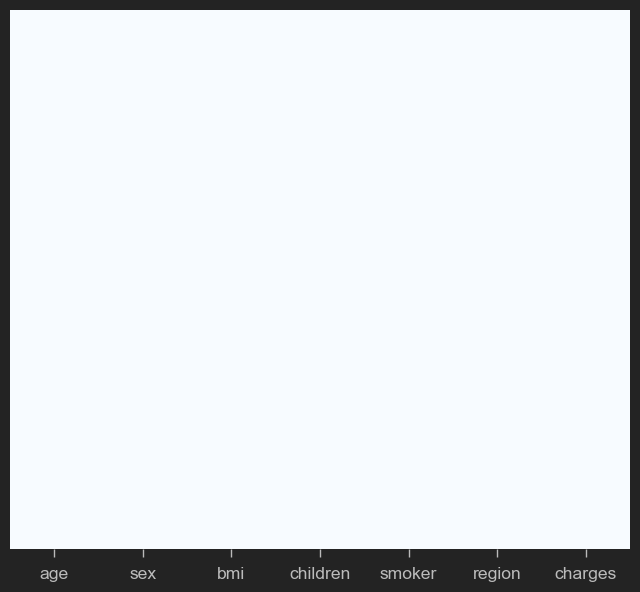

In [6]:
# check if there are any Null values
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [7]:
# Get idea of mean, max and avg age, bmi, children and charges
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


  -  **Grouping by region to see any relationship between region and charges**

In [8]:
df_region = insurance_df.groupby(by = 'region').mean(('age'),('bmi'),('charges'))
df_region


,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


Seems like south east region has the highest charges and body mass index


- **Grouping data by 'age' and examine the relationship between 'age' and 'charges'**


In [9]:
df_age = insurance_df.groupby(by = 'age').mean(('bmi'),('charges'))
df_age


,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


As customers' age increses, the charges tend to increase as well. 
This makes sense because as people age, they have more health problems, hence more usage of insurance

### FEATURE ENGINEERING

In [10]:
# Check unique values in the 'sex' column
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [11]:
# convert categorical variable to numerical
insurance_df['sex'] = insurance_df['sex'].apply(lambda x:0    if x=='female' else 1)

In [12]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [13]:
# Check the unique values in the 'smoker' column
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [14]:
# Convert categorical variable to numerical 
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [15]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [16]:
# Check unique values in 'region' column
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)


In [18]:
region_dummies

,northwest,southeast,southwest
0,False,False,True
1,False,True,False
2,False,True,False
3,True,False,False
4,True,False,False
...,...,...,...
1333,True,False,False
1334,False,False,False
1335,False,True,False
1336,False,False,True


In [19]:
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)

In [20]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,False,False,True
1,18,1,33.770,1,0,southeast,1725.55230,False,True,False
2,28,1,33.000,3,0,southeast,4449.46200,False,True,False
3,33,1,22.705,0,0,northwest,21984.47061,True,False,False
4,32,1,28.880,0,0,northwest,3866.85520,True,False,False


In [21]:
# Let's drop the original 'region' column 
insurance_df.drop(['region'], axis = 1, inplace = True)


In [22]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


## DATA VISUALIZATION

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

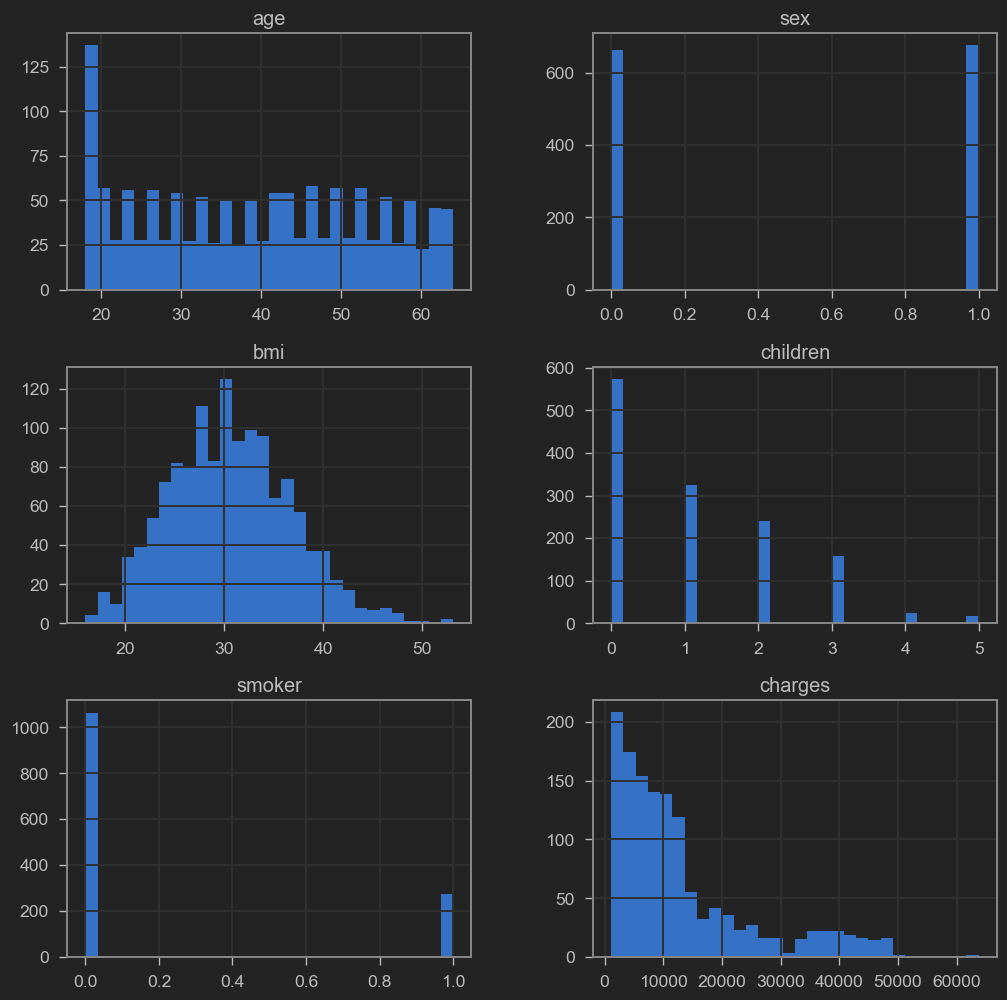

In [23]:
insurance_df[ ['age', 'sex', 'bmi', 'children', 'smoker', 'charges'] ].hist(bins = 30, figsize= (12,12))

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


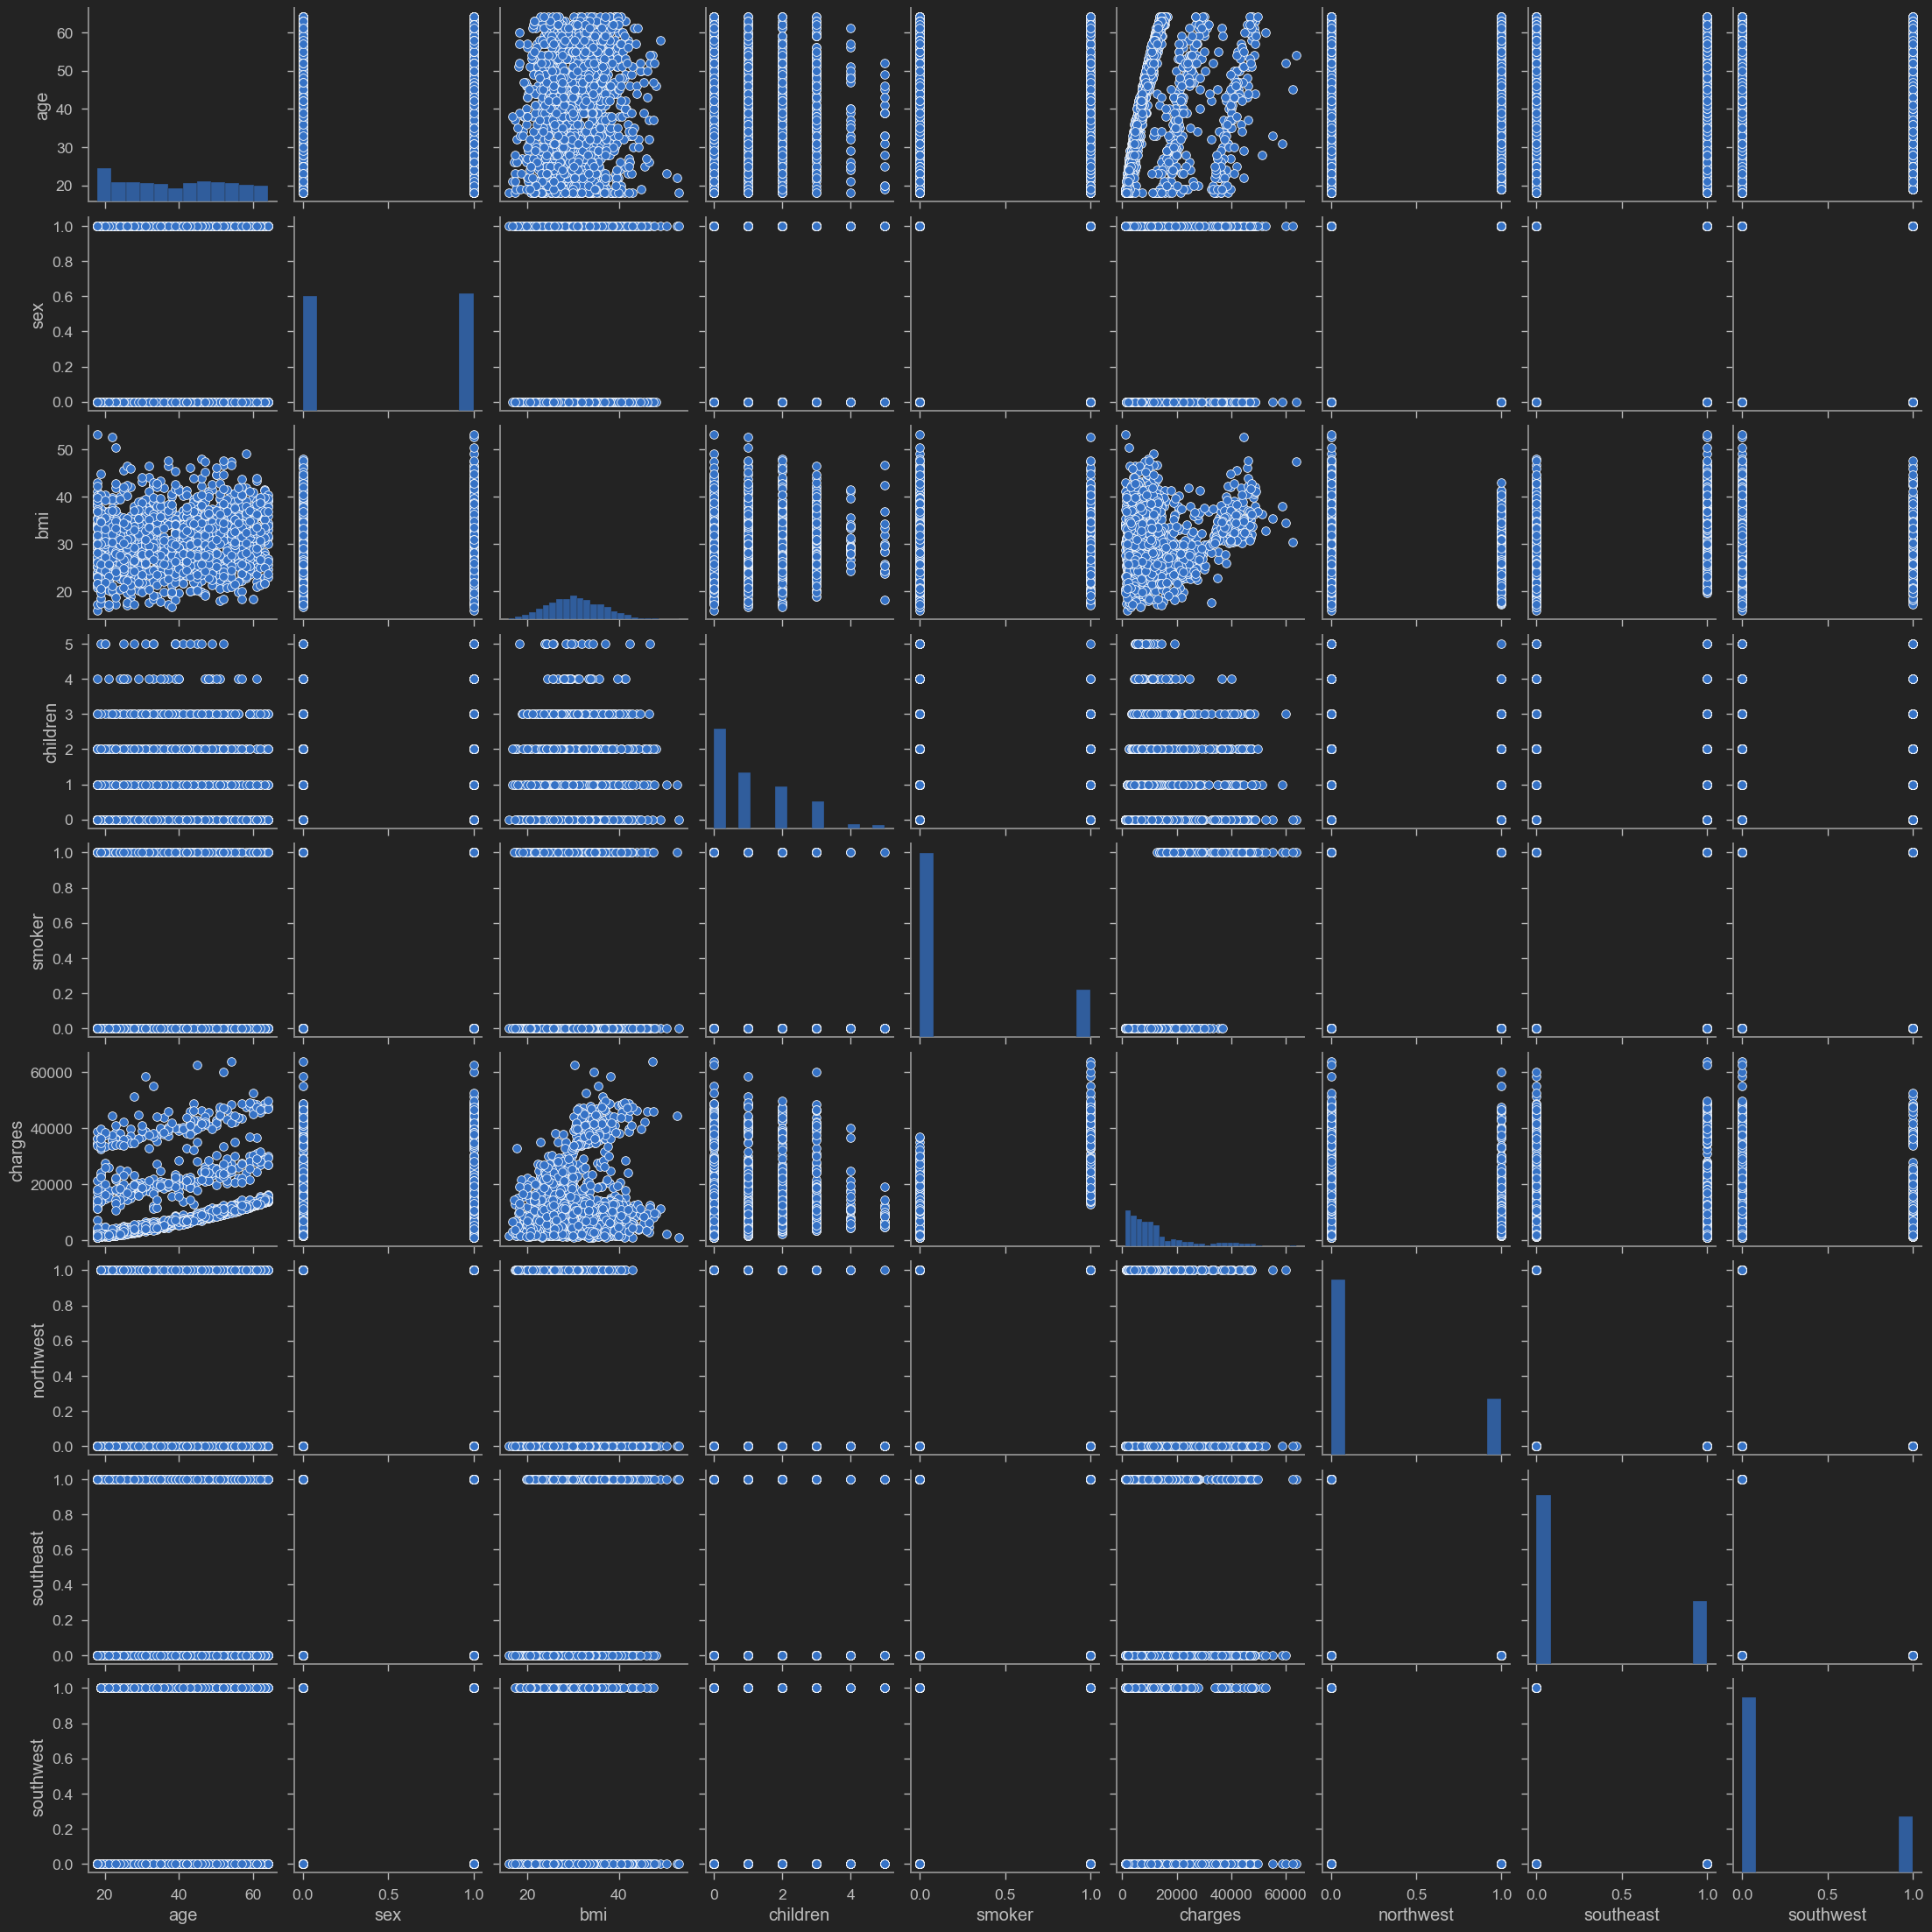

In [24]:
# plot pairplot with seaborn
sns.pairplot(insurance_df)


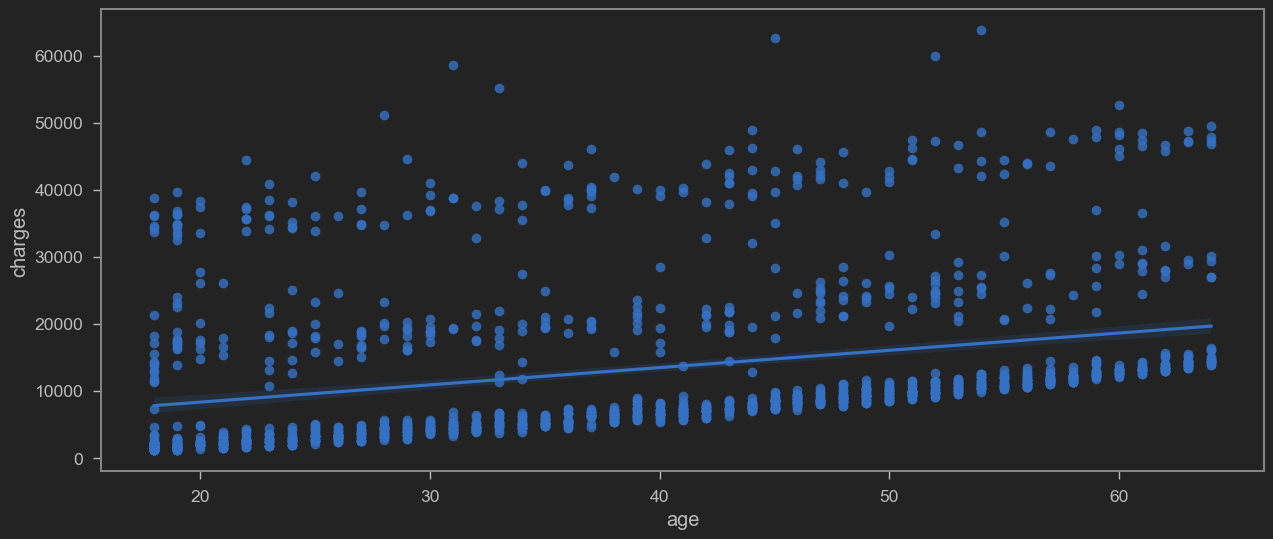

In [25]:
# regression plot age vs charges
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()
  

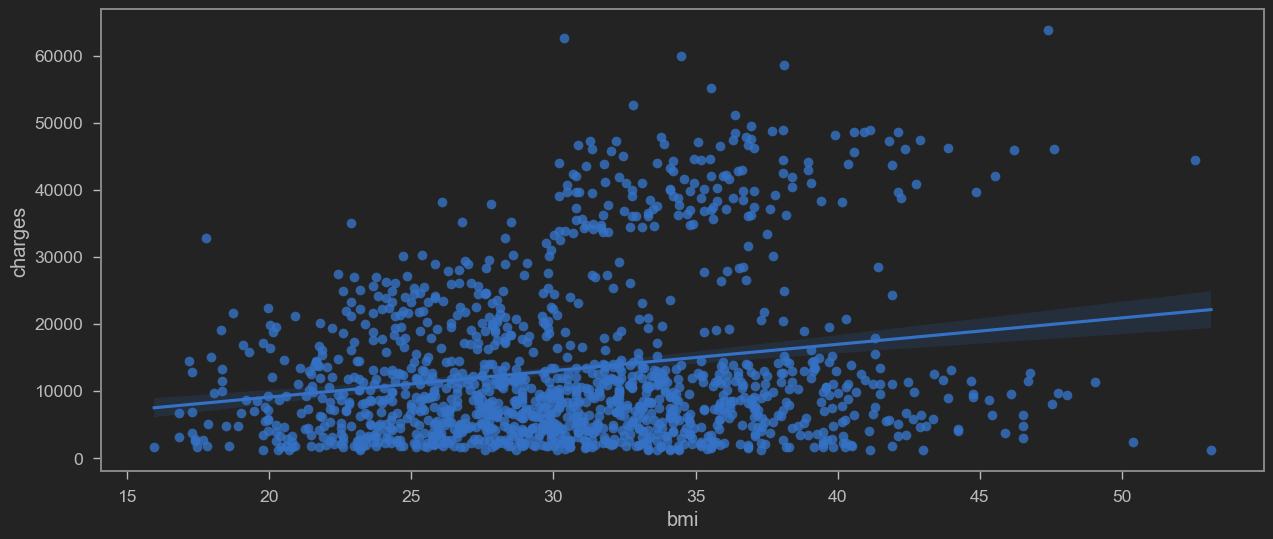

In [26]:
# regression plot of bmi vs charges
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()
  

As bmi increases, the charges tend to increase slightly as well


 - **Calculatimg and plot the correlation matrix**
 - **Figure out which feature has the most positive correlation with charges**

In [27]:
insurance_df.corr()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


<Axes: >

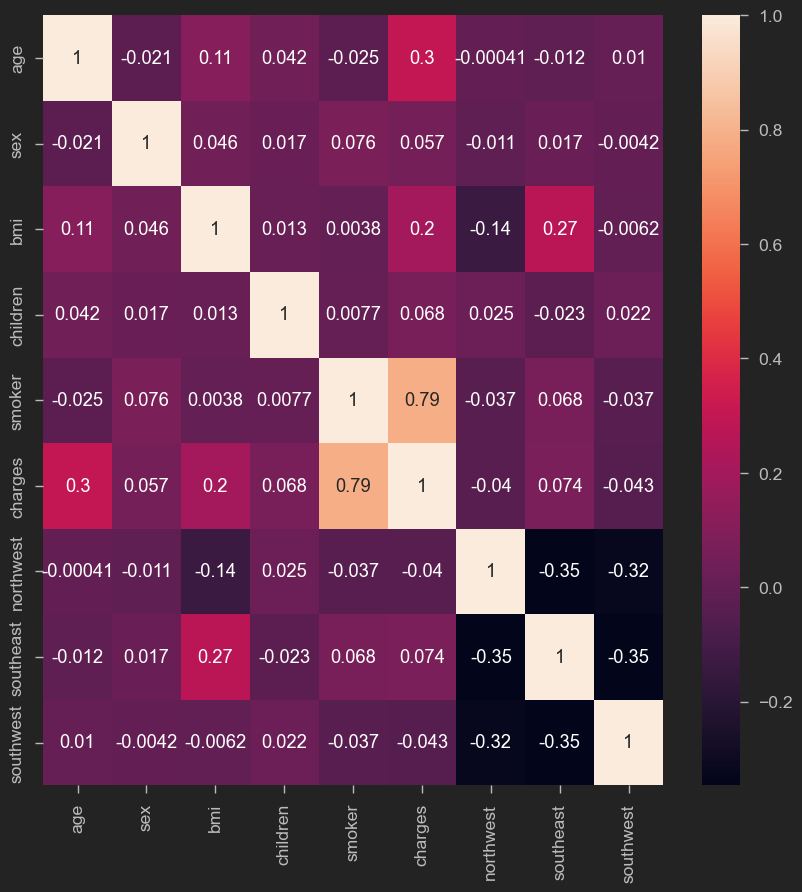

In [28]:
plt.figure(figsize = (10,10))
sns.heatmap(insurance_df.corr(), annot=True)

Positive correlation between: 
1. smokers and charges  (79%) - smokers have the highest charges
2. age and charges (30%)
3. bmi and charges (20%)



### CREATING TRAINING AND TESTING DATASET

In [29]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [30]:
# divide date into inupts (X) and output (y)
X=insurance_df.drop(columns=['charges'])
y=insurance_df['charges']

In [31]:
X.shape

(1338, 8)

In [32]:
y.shape

(1338,)

In [33]:
#convert data to numpy array
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [34]:
y = y.reshape(-1,1)

In [35]:
# Only take the numerical variables and scale them
X 

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [36]:
y.shape

(1338, 1)

In [37]:
#scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)


- **Split the data into 20% Testing and 80% Training**
- **Double check that the split was successful by getting the shape of both the training and testing datasets**

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state =10)
X_train.shape, y_train.shape

((1070, 8), (1070, 1))

## TRAINING AND EVALUATING A LINEAR REGRESSION MODEL IN SCIKIT-LEARN

In [58]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

#instantiate object of linear regression
linear_reg = LinearRegression()
linear_reg.fit (X_train, y_train)

LinearRegression()

In [59]:
linear_reg_accuracy = linear_reg.score(X_test, y_test)
linear_reg_accuracy

0.6953286262755438

Linear Regression Model achileved a 69% accuracy score.

In [60]:
y_predict = linear_reg.predict(X_test)

In [61]:
y_predict_orig = scaler_y.inverse_transform(y_predict)  # to get charges in it's original values before scaling was applied
y_test_orig = scaler_y.inverse_transform(y_test)


In [62]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [63]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt


RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)  #coefficient of determination
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 6536.847 
MSE = 42730370.0 
MAE = 4555.098 
R2 = 0.6953286415758744 
Adjusted R2 = 0.6859179432461717


The coefficient of determinatio (R2) was 69%. This means that 69% of the variations in the output (Charges) was represented by the variations in the input features.
This is a reasonable score however we can still attempt to increase the score and get it closer to 100%.

## TRAINING AND EVALUATING AN ARTIFICIAL NEURAL NETWORK-BASED REGRESSION MODEL

In [64]:
import tensorflow as tf  #google's framework (deep learning library) to build, train and deploy AI and ML models
from tensorflow import keras  #keras is an API
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [65]:
ANN_model = keras.Sequential()  #ANN model, then add layers
ANN_model.add(Dense(50, input_dim = 8))  #dense layer with 50 neurons, input dimentions to macth 8 column inputs)
ANN_model.add(Activation('relu'))  #activation function - rectified linear units to introduce non-linearity to network
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))  #output
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                450       
                                                                 
 activation_4 (Activation)   (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 150)               7650      
                                                                 
 activation_5 (Activation)   (None, 150)               0         
                                                                 
 dense_7 (Dense)             (None, 150)               22650     
                                                                 
 activation_6 (Activation)   (None, 150)               0         
                                                                 
 dense_8 (Dense)             (None, 50)               

**about 38,351 artificially trainable parameters to optimize**

In [66]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size= 20, validation_split= 0.2)  #keep track of loss or error (starts high but goes down as the model is being trained)


Epoch 1/100
43/43 [==============================] - 1s 4ms/step - loss: 0.4018 - val_loss: 0.2580
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1773 - val_loss: 0.1904
Epoch 3/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1421 - val_loss: 0.1905
Epoch 4/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1334 - val_loss: 0.1719
Epoch 5/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1289 - val_loss: 0.1797
Epoch 6/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1206 - val_loss: 0.1807
Epoch 7/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1194 - val_loss: 0.1785
Epoch 8/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1122 - val_loss: 0.1876
Epoch 9/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1116 - val_loss: 0.1898
Epoch 10/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1117 - val_loss: 0.1909
Epoch 11/

In [67]:
#Evaluate the results of the trained model

result = ANN_model.evaluate(X_test, y_test)#
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 [==============================] - 0s 2ms/step - loss: 0.2591
Accuracy : 0.7409380674362183


Accuracy is about 74%

In [69]:
epochs_hist.history.keys()  #kept track of both the loss and validation loss

dict_keys(['loss', 'val_loss'])

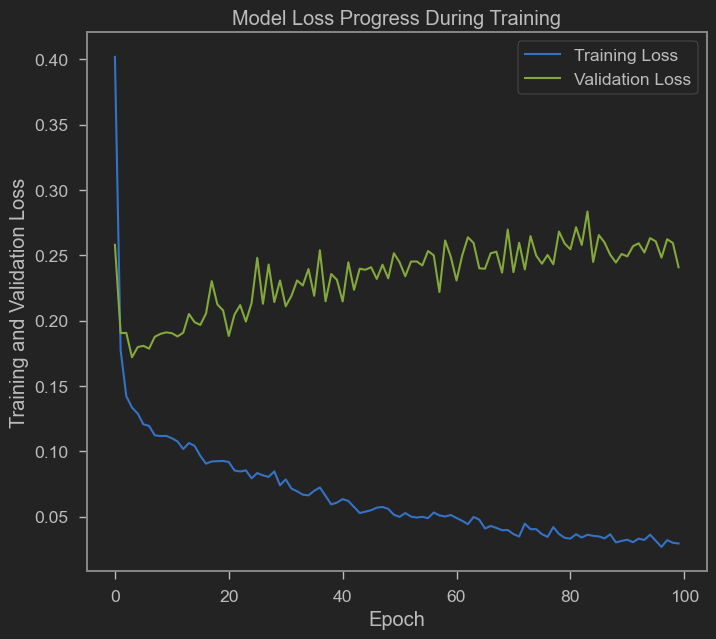

In [70]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

- The Validation error tends to increase slightligh, showing the model is overfiting the training data, however, model still performed quite well.
- In essence, performance on training data was good, but not great on test data.

9/9 [==============================] - 0s 1ms/step


Text(0, 0.5, 'True Values')

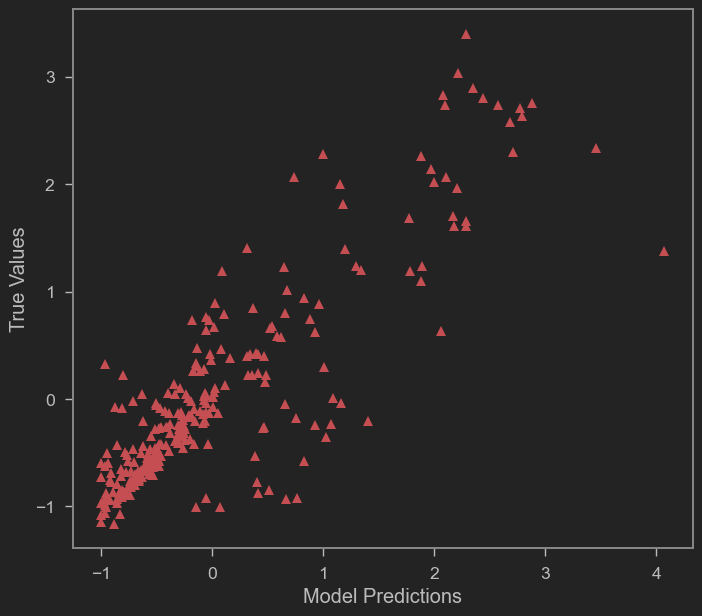

In [71]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')  #compatre the y_test to the model predictions (y_predict)
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


Model predictions seem ok, but not as accurate 

In [72]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

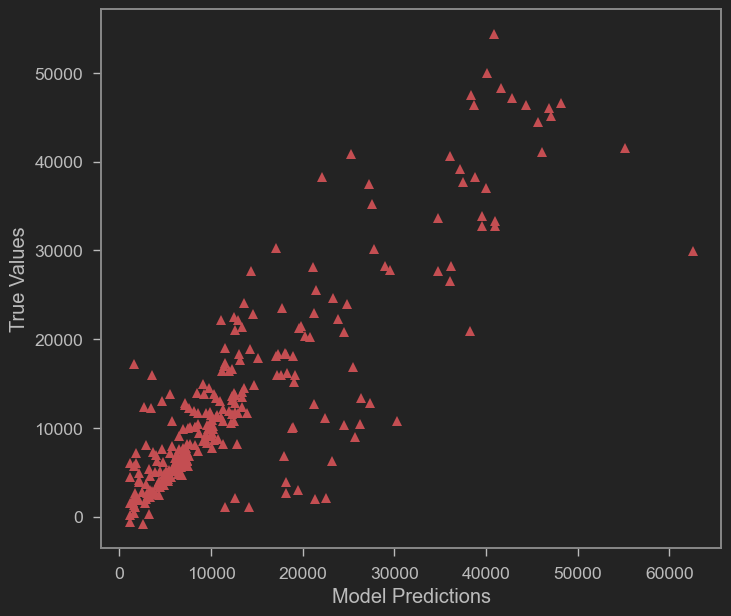

In [73]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


Beyond 20,000, the model predictions did not accurately match the True values (test data set).

In [74]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 6161.465 
MSE = 37963650.0 
MAE = 3815.8079 
R2 = 0.7293158320104738 
Adjusted R2 = 0.7209549310687123


The coefficient of determinatio (R2) is 72%, which slighlty more accurate compared to the linear regresion model with scikit learn.

# DROPOUT INTRODUCTION

- **Dropout is a regularization technique that is used to improve the network generalization ability.** 
- **Next steps will introduce dropout layers to enahnce network generalization ability**
- **Then the network will be retrained and its performance will be assessed**

In [75]:
ANN_model = keras.Sequential()  #ANN model, then add layers
ANN_model.add(Dense(50, input_dim = 8))  #dense layer with 50 neurons, input dimentions to macth 8 column inputs)
ANN_model.add(Activation('relu'))  #activation function - rectified linear units to introduce non-linearity to network
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))  #output
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                450       
                                                                 
 activation_8 (Activation)   (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 150)               7650      
                                                                 
 activation_9 (Activation)   (None, 150)               0         
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_12 (Dense)            (None, 150)               22650     
                                                                 
 activation_10 (Activation)  (None, 150)              

In [76]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size= 20, validation_split= 0.2)  #keep track of loss or error (starts high but goes down as the model is being trained)


Epoch 1/100
43/43 [==============================] - 1s 5ms/step - loss: 0.7246 - val_loss: 0.3026
Epoch 2/100
43/43 [==============================] - 0s 4ms/step - loss: 0.3881 - val_loss: 0.2045
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 0.3047 - val_loss: 0.2128
Epoch 4/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2763 - val_loss: 0.2085
Epoch 5/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2508 - val_loss: 0.1860
Epoch 6/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2580 - val_loss: 0.2061
Epoch 7/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2350 - val_loss: 0.2046
Epoch 8/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2395 - val_loss: 0.1790
Epoch 9/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2154 - val_loss: 0.1895
Epoch 10/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2030 - val_loss: 0.2098
Epoch 11/

In [78]:
#Evaluate the results of the trained model

result = ANN_model.evaluate(X_test, y_test)#
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 [==============================] - 0s 1ms/step - loss: 0.1963
Accuracy : 0.803739458322525


Accuracy is 80.4% and there is less overfit.

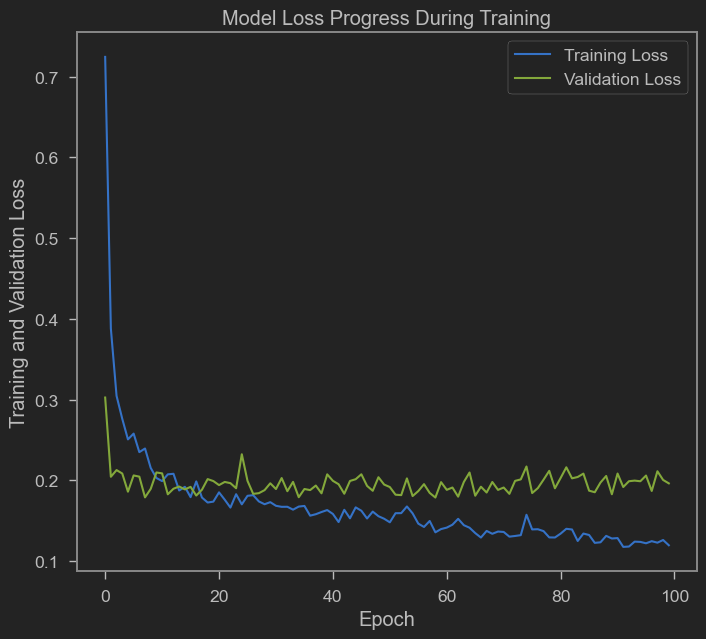

In [84]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

9/9 [==============================] - 0s 1ms/step


Text(0, 0.5, 'True Values')

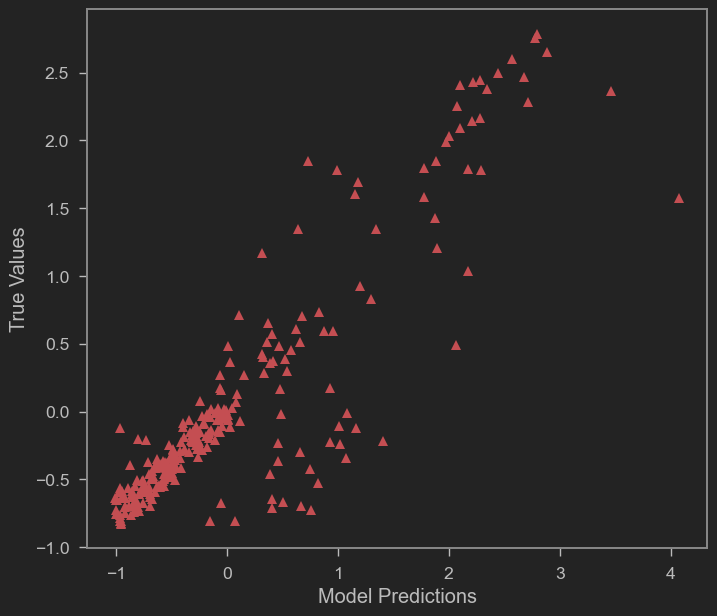

In [85]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')  #compatre the y_test to the model predictions (y_predict)
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [86]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

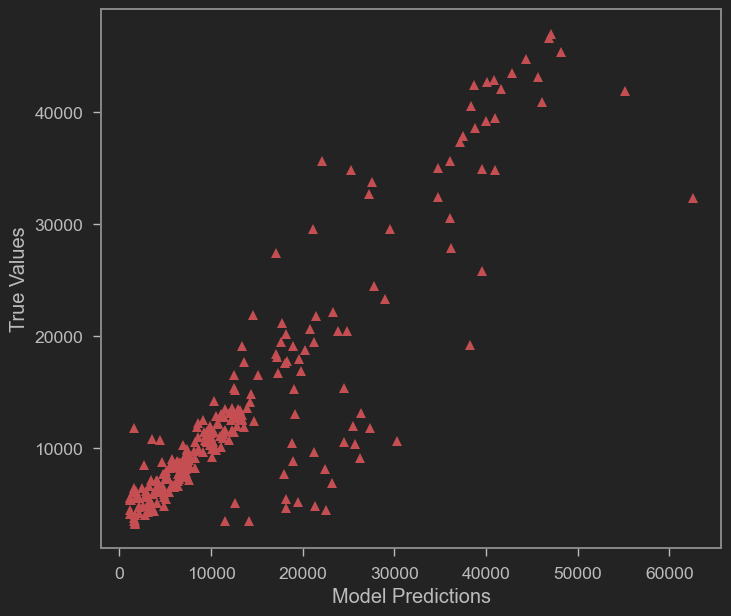

In [87]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [88]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 5362.887 
MSE = 28760556.0 
MAE = 3271.4172 
R2 = 0.7949346600648356 
Adjusted R2 = 0.7886005955108537


After dropout was introduced, the coefficient of determination (R2) became **79.5%** compared to 72.9% before dropout.